In [3]:
os.chdir("../")

import sim_tools as sim_tools
import local_paths as lp
import os

bed = sim_tools.SimParams(lp.earth)

In [4]:
values = {
    "box width": bed.box_width,
    "box height": bed.box_height,
    "data index": bed.DATA_OFFSET,
    "dim index": bed.DIM_OFFSET,
    "disc index": bed.DISC_ID,
    "num ts": bed.num_timesteps,
    "num particle": bed.num_particles,
    "all fields": bed.fields
}
for key,value in values.items():
    print(f"{key:13s}-> {value}")

box width    -> 0.33
box height   -> 0.84
data index   -> 9
dim index    -> 5
disc index   -> 9460
num ts       -> 201
num particle -> 9460
all fields   -> ['id', 'type', 'xs', 'ys', 'zs', 'radius']


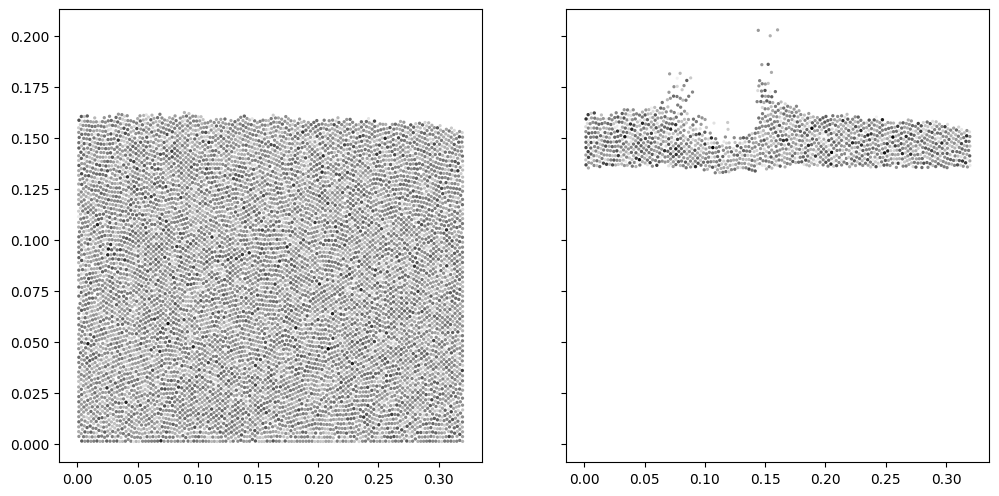

In [5]:
import matplotlib.pyplot as plt
import numpy as np

init_bed = bed.initial_state
x_coords = np.array(init_bed.get_data('x',as_array=True))
y_coords = np.array(init_bed.get_data('y',as_array=True))
rad = np.array(init_bed.get_data('radius',as_array=True))

subset = init_bed.is_greater('y',0.135)
time = 10
mid_bed = bed.get_bed_static(idx=time,include_only=subset)

fig,(ax1,ax2) = plt.subplots(1,2,dpi=100,figsize=(12,6),sharey="row")

ax1.scatter(
    np.array(init_bed.get_data('x',as_array=True)),
    np.array(init_bed.get_data('y',as_array=True)),
    s=np.array(init_bed.get_data('radius',as_array=True))*1500,
    c=np.array(init_bed.get_data('radius',as_array=True)),
    cmap='Greys'
)
ax2.scatter(
    np.array(mid_bed.get_data('x',as_array=True)),
    np.array(mid_bed.get_data('y',as_array=True)),
    s=np.array(mid_bed.get_data('radius',as_array=True))*1500,
    c=np.array(mid_bed.get_data('radius',as_array=True)),
    cmap='Greys'
)


In [6]:
bed.render_bed_single()
exp_bed = bed.get_bed_dynamic(idx=time,include_only=subset)

Start Single
End Test Single
Single Time: 69.03467050399922


In [7]:
for field in ['x','y','v_x','v_y','a_x','a_y']:
    print(len(exp_bed.get_data(field,as_array=True)),end=" ")

1442 1442 1442 1442 1442 1442 

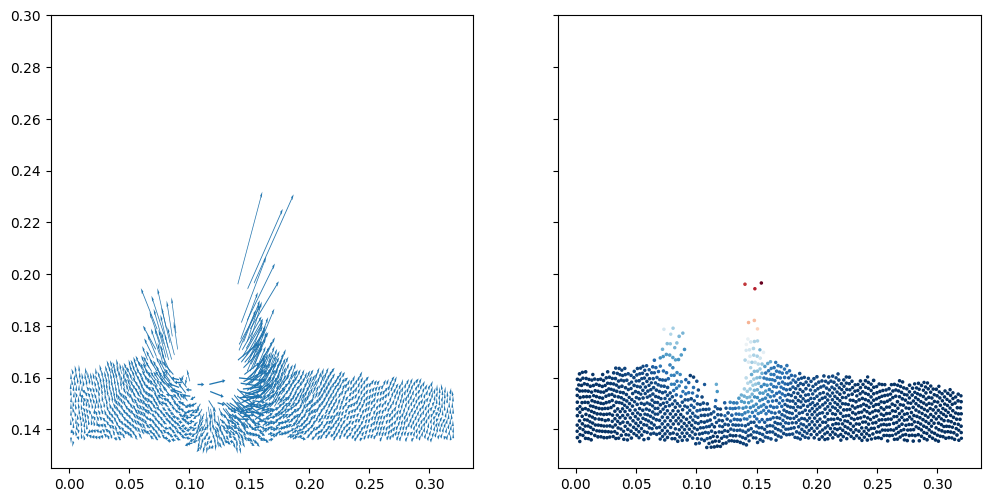

In [25]:
import math

fig,(ax1,ax2) = plt.subplots(1,2,dpi=100,figsize=(12,6),sharey="row")

xs = exp_bed.get_data('x',as_array=True)
ys = exp_bed.get_data('y',as_array=True)
v_xs = exp_bed.get_data('v_x',as_array=True)
v_ys = exp_bed.get_data('v_y',as_array=True)

for x,y,vx,vy in zip(xs,ys,v_xs,v_ys):
    ax1.arrow(
        x,
        y,
        vx*10e2,
        vy*10e2,
        width=0.0005,
        linewidth=0.01
    )
ax2.scatter(
    xs,ys,
    s = np.array(exp_bed.get_data('radius',as_array=True))*2000,
    c = [ math.sqrt(((vx*100)**2+(vy*100)**2)) for vx,vy in zip(v_xs,v_ys) ],
    cmap='RdBu_r'
)

for ax in [ax1,ax2]:
    ax.set_ylim((0.125,0.3))
